In [1]:
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interactive
import numpy as np

In [2]:
change = cv2.imread('./images/one-piece.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
def my_threshold(thresh):
    global dst
    global change
    th, dst = cv2.threshold(change, thresh, 255, cv2.THRESH_BINARY)
    fig, axes = plt.subplots(1, 2, figsize=(12,16))
    axes[0].imshow(change, 'gray')
    axes[1].imshow(dst, 'gray')
    
interactive(my_threshold, thresh=(0, 255))

interactive(children=(IntSlider(value=127, description='thresh', max=255), Output()), _dom_classes=('widget-in…

In [25]:
def my_filters(filtros, kernels):
    global dst
    global change
    if filtros == cv2.GaussianBlur or filtros ==  cv2.blur:
        dst = filtros(change, (kernels,kernels), cv2.BORDER_DEFAULT)
    if filtros == cv2.filter2D:
        kernel = np.ones((5,5),np.float32)/25
        dst = filtros(change, -1,kernel)
    if filtros == cv2.medianBlur:
        dst = cv2.medianBlur(change,kernels)
    fig, axes = plt.subplots(1, 2, figsize=(12,16))
    axes[0].imshow(change, 'gray')
    axes[1].imshow(dst, 'gray')
    
interactive(my_filters, filtros={'Gaussian Blur' : cv2.GaussianBlur, 'Averaging Blur': cv2.blur, 'filter 2D': cv2.filter2D, 'median Blur': cv2.medianBlur}, kernels=[3, 5, 7, 9, 11, 21])

interactive(children=(Dropdown(description='filtros', options={'Gaussian Blur': <built-in function GaussianBlu…

In [5]:
def my_canny(x, y):
    global dst
    global change
    dst = cv2.Canny(change,x,y)
    fig, axes = plt.subplots(1, 2, figsize=(12,16))
    axes[0].imshow(change, 'gray')
    axes[1].imshow(dst, 'gray')
    
interactive(my_canny, x=(0, 255), y=(0, 255))

interactive(children=(IntSlider(value=127, description='x', max=255), IntSlider(value=127, description='y', ma…

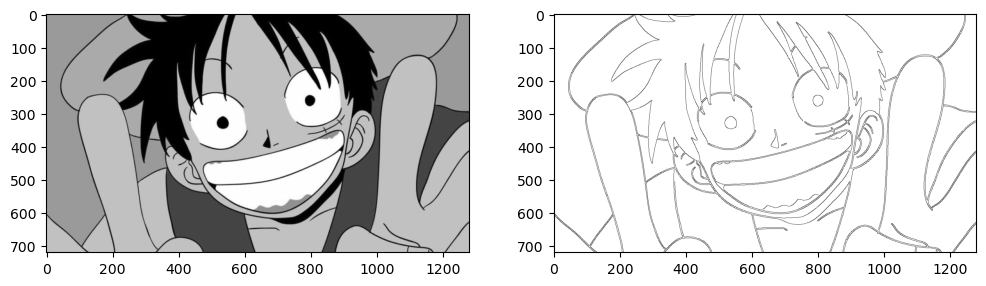

In [29]:
#criando modelos
edge = cv2.Canny(change,100,200)
th, dst = cv2.threshold(edge, 127, 255, cv2.THRESH_BINARY_INV)
result = dst
fig, axes = plt.subplots(1, 2, figsize=(12,16))
axes[0].imshow(change, 'gray')
axes[1].imshow(result, 'gray')